In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

X = np.random.randn(200, 2)
true_w = np.array([3.0, -2.0])
true_b = 5.0

y = X @ true_w + true_b + np.random.randn(200) * 0.5

Linear Regression

In [3]:
class StandardScalerManual:
    def fit(self, X):
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        self.std[self.std == 0] = 1

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [4]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

In [5]:
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        self.losses = []

        for _ in range(self.epochs):
            y_pred = X @ self.w + self.b
            error = y_pred - y

            mse = (error ** 2).mean()
            reg = self.l2_lambda * np.sum(self.w ** 2)
            self.losses.append(mse + reg)

            dw = (2 / n_samples) * (X.T @ error) + 2 * self.l2_lambda * self.w
            db = (2 / n_samples) * error.sum()

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X @ self.w + self.b


In [6]:
model = LinearRegressionManual(
    lr=0.05,
    epochs=1000,
    l2_lambda=0.1
)

model.fit(X_scaled, y)

In [7]:
y_pred = model.predict(X_scaled)

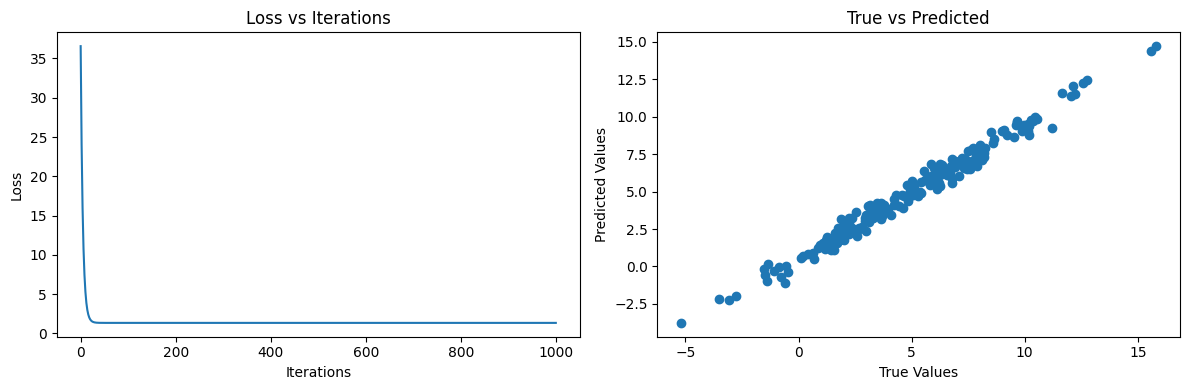

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")

plt.subplot(1, 2, 2)
plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")

plt.tight_layout()
plt.show()



Logistic Regression

In [9]:
true_w = np.array([3.0, -2.0])
true_b = 1.0

linear = X @ true_w + true_b
probs = 1 / (1 + np.exp(-linear))

y_bin = (probs >= 0.5).astype(int)


In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [11]:
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        self.losses = []

        for _ in range(self.epochs):
            linear = X @ self.w + self.b
            y_pred = sigmoid(linear)

            eps = 1e-9
            loss = -np.mean(
                y * np.log(y_pred + eps) +
                (1 - y) * np.log(1 - y_pred + eps)
            )
            reg = self.l2_lambda * np.sum(self.w ** 2)
            self.losses.append(loss + reg)

            dw = (1 / n_samples) * (X.T @ (y_pred - y)) + 2 * self.l2_lambda * self.w
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        linear = X @ self.w + self.b
        return (sigmoid(linear) >= 0.5).astype(int)


In [12]:
model = LogisticRegressionManual(
    lr=0.1,
    epochs=1000,
    l2_lambda=0.1
)

model.fit(X_scaled, y_bin)


In [13]:
y_pred = model.predict(X_scaled)
accuracy = np.mean(y_pred == y_bin)
accuracy


np.float64(0.97)

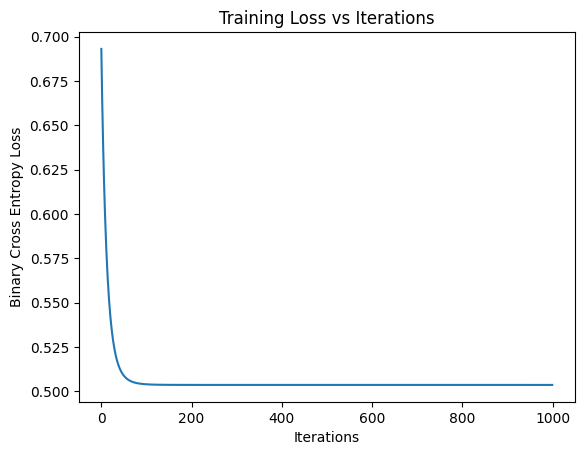

In [14]:
plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss vs Iterations")
plt.show()


K-means clustering

In [15]:
np.random.seed(42)
M = np.random.randn(6, 6)

In [16]:
def kmeans_matrix(M, k, max_iters=100):
    n, m = M.shape
    data = M.flatten()
    N = data.shape[0]

    centroids = np.random.choice(data, k, replace=False)

    for _ in range(max_iters):
        distances = np.abs(data[:, None] - centroids[None, :])
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([
            data[labels == i].mean() if np.any(labels == i) else centroids[i]
            for i in range(k)
        ])

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    table = labels.reshape(n, m)

    cookbook = {i: [] for i in range(k)}
    for idx, label in enumerate(labels):
        i, j = divmod(idx, m)
        cookbook[label].append((i, j))

    return table, cookbook, centroids

In [20]:
k = 5
table, cookbook, centroids = kmeans_matrix(M, k)


In [21]:
table, cookbook, centroids


(array([[1, 3, 1, 4, 3, 3],
        [4, 1, 3, 1, 3, 3],
        [1, 2, 2, 0, 0, 1],
        [0, 2, 4, 3, 3, 2],
        [0, 3, 0, 1, 0, 3],
        [0, 4, 3, 0, 1, 0]]),
 {0: [(2, 3), (2, 4), (3, 0), (4, 0), (4, 2), (4, 4), (5, 0), (5, 3), (5, 5)],
  1: [(0, 0), (0, 2), (1, 1), (1, 3), (2, 0), (2, 5), (4, 3), (5, 4)],
  2: [(2, 1), (2, 2), (3, 1), (3, 5)],
  3: [(0, 1),
   (0, 4),
   (0, 5),
   (1, 2),
   (1, 4),
   (1, 5),
   (3, 3),
   (3, 4),
   (4, 1),
   (4, 5),
   (5, 2)],
  4: [(0, 3), (1, 0), (3, 2), (5, 1)]},
 array([-0.85104655,  0.52610625, -1.61881249, -0.21433572,  1.60504241]))

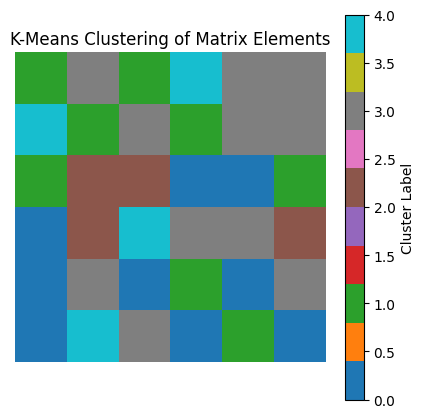

In [22]:
plt.figure(figsize=(5, 5))
plt.imshow(table, cmap='tab10')
plt.colorbar(label='Cluster Label')
plt.title('K-Means Clustering of Matrix Elements')
plt.axis('off')
plt.show()